1. Setup and Load Data

1.1 Install Dependencies and Setup

In [1]:
%pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
appnope                 0.1.4
asttokens               3.0.0
astunparse              1.6.3
certifi                 2024.12.14
charset-normalizer      3.4.0
comm                    0.2.2
contourpy               1.3.1
cycler                  0.12.1
debugpy                 1.8.9
decorator               5.1.1
executing               2.1.0
flatbuffers             24.12.23
fonttools               4.55.3
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.68.1
h5py                    3.12.1
idna                    3.10
ipykernel               6.29.5
ipython                 8.30.0
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.7.2
keras                   3.7.0
kiwisolver              1.4.7
libclang                18.1.1
Markdown                3.7
markdown-it-py          3.0.0
MarkupSafe              3.0.2
matplotlib         

In [4]:
import tensorflow as tf
import os

This part is to prevent tf from taking up all the available memory.

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [6]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
gpus

[]

1.2 Remove dodgy images. 

In [8]:
import cv2 #common library for computer vision
import imghdr #checks our file extensions 
from matplotlib import pyplot as plt

In [9]:
data_dir = 'data' # points to the data folder containing our data

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png'] #standard list of image extensions

Code for removing the dodgy images

In [11]:
for image_class in os.listdir(data_dir):
    image_class_path = os.path.join(data_dir, image_class)#to loop through every single image
    # Check if the current item is a directory
    if not os.path.isdir(image_class_path):
        continue
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)#to check if opencv can open the image
            #cv2.imread(image_path)#reads image as a numpy array of pixels
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
    

1.3 Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
##tf.keras.utils.image_dataset_from_directory?? -- preprocesses data before training

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')#builds an image dataset for you and preprocessing on the fly

Found 309 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()#used for looping through data since the data variable in previous line cannot be accessed easily as data[0] so we need to convert it into an iterator we can use

In [23]:
batch = data_iterator.next()#actually allows us to access the batches of data

In [24]:
batch

(array([[[[1.14694138e+02, 1.18694138e+02, 1.21563675e+02],
          [1.14113281e+02, 1.20113281e+02, 1.20113281e+02],
          [1.16326157e+02, 1.22326157e+02, 1.22326157e+02],
          ...,
          [2.10000000e+01, 3.00000000e+01, 3.70000000e+01],
          [1.90000000e+01, 2.80000000e+01, 3.50000000e+01],
          [1.93710938e+01, 3.03710938e+01, 3.23710938e+01]],
 
         [[1.13628906e+02, 1.16000000e+02, 1.26886719e+02],
          [1.16886719e+02, 1.22886719e+02, 1.22886719e+02],
          [1.21238281e+02, 1.27238281e+02, 1.27238281e+02],
          ...,
          [2.10000000e+01, 3.00000000e+01, 3.70000000e+01],
          [2.10000000e+01, 3.00000000e+01, 3.70000000e+01],
          [1.82578125e+01, 2.92578125e+01, 3.12578125e+01]],
 
         [[1.16000000e+02, 1.19742188e+02, 1.26371094e+02],
          [1.16886719e+02, 1.21886719e+02, 1.27886719e+02],
          [1.18000000e+02, 1.23000000e+02, 1.29000000e+02],
          ...,
          [2.10000000e+01, 3.00000000e+01, 3.7000

In [25]:
len(batch)

2

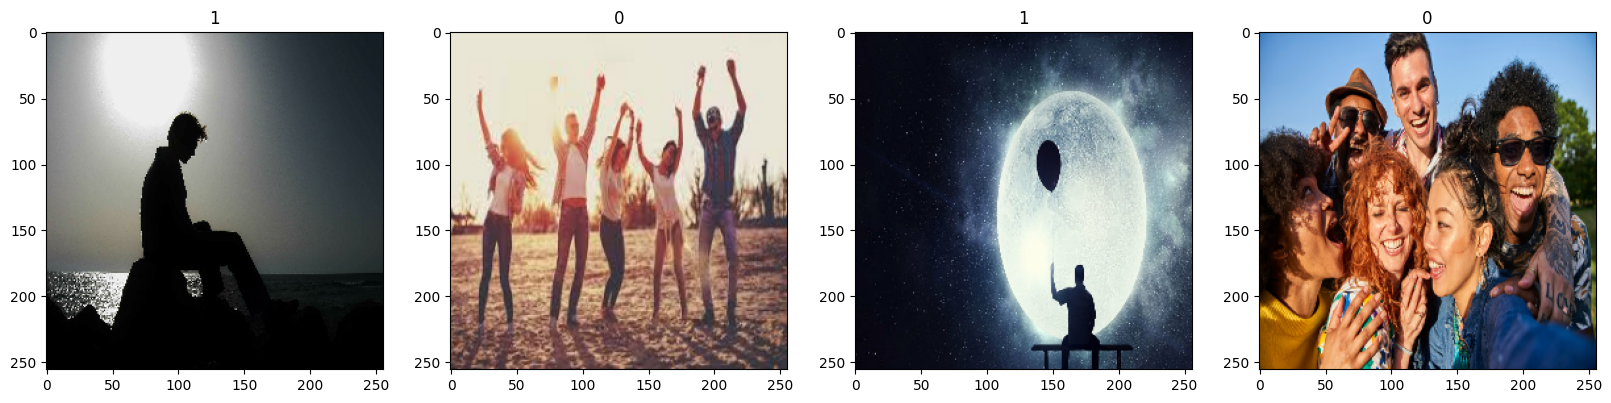

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    #used to visualize the images to crosscheck what 1 and 0 represent
    #1 -- sad
    #0 -- happy

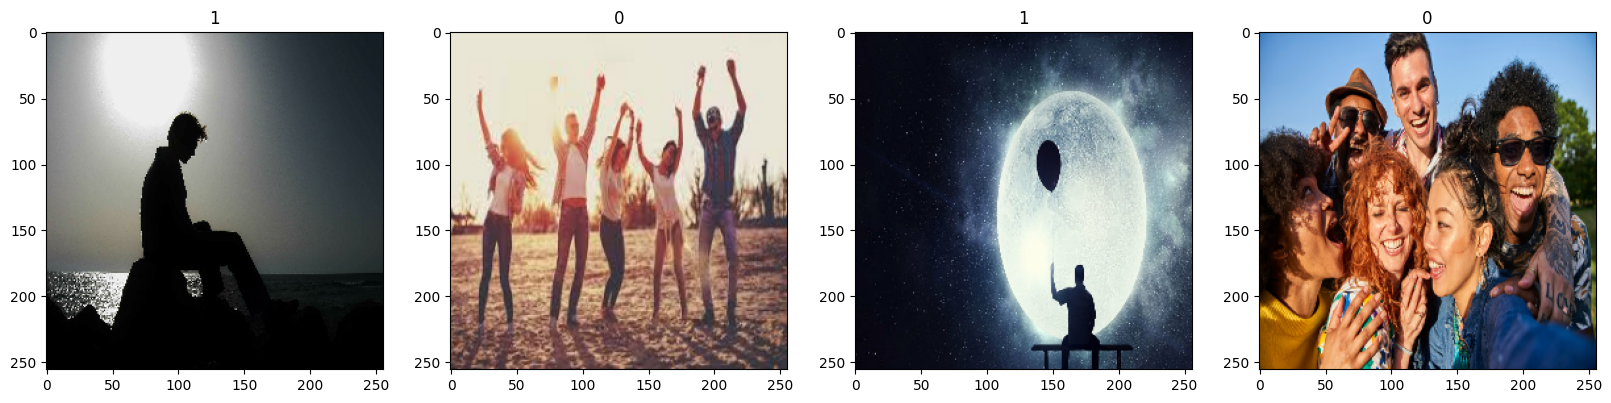

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

2. Preprocess Data
   2.1 Scale Data

In [15]:
data = data.map(lambda x, y: (x/255, y))#to scale the size of our images to be smaller for optimization.

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

In [18]:
batch[0].min()

np.float32(0.0)

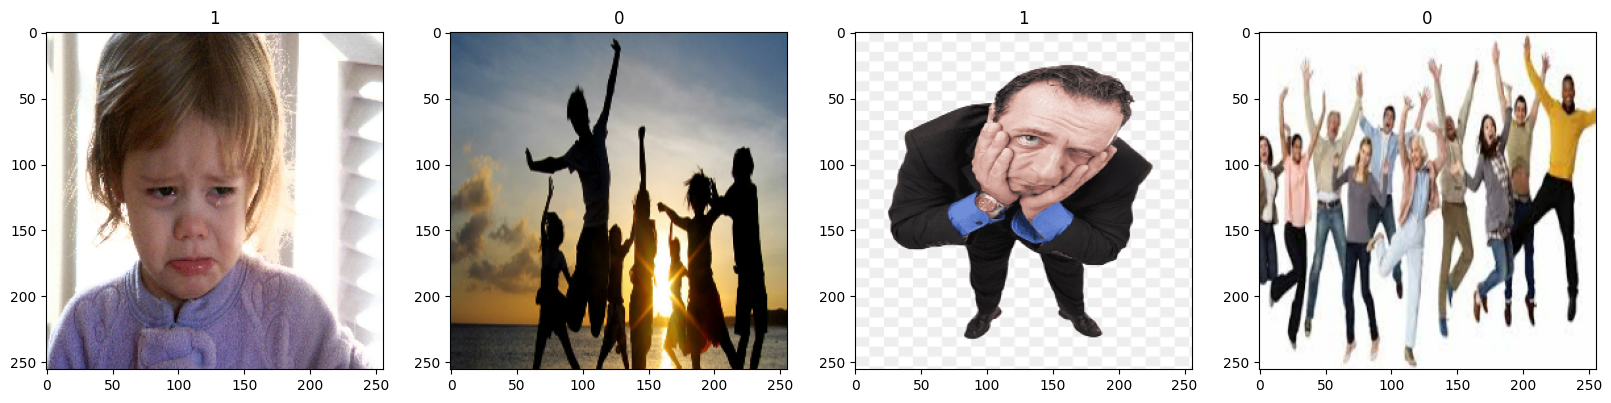

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)#because our values are now as floats not ints
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [20]:
len(data)#this means i have 10 batches each of 32 images

10

In [21]:
#sizes of training batch, validation and testing batches. just allocating data for these uses.

In [22]:
train_size = int(len(data)*.7)#70 percent is training
val_size = int(len(data)*.2)#20 percent is validation
test_size = int(len(data)*.1)# 10 percent is for testing

In [23]:
train_size#to train the model
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+ val_size).take(test_size)

3. Deep Model

3.1 Build Deep Learning Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout#importing the necessary modules to build our model

In [25]:
model = Sequential()

In [26]:
#our layers
model.add(Input(shape=(256,256,3)))
model.add(Conv2D(16, (3,3), 1, activation='relu'))#convolution layer has an input, 16 is no of filters, 3,3 is the size and 1 is the stride meaning 1 pixel per
model.add(MaxPooling2D())#to condense the data 
#relu helps to convert negative values to positive values
#sigmoid activation is a function that takes the data and passes it through this function to reshape it(in this case it condenses it to 0-1)

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())#to flatten the data

model.add(Dense(256, activation='relu'))#fully connected layers
model.add(Dense(1, activation='sigmoid'))#single dense layer


In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [33]:
logdir = 'logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20,validation_data=val, callbacks=[tensorboard_callback])

3.3 Plot performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

4. Evaluate Performance
   4.1 Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()

In [ ]:
re = Recall()

In [ ]:
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():#for each batch in the testing phase
    X, y = batch#images and labels
    yhat = model.predict(X)#predicted values in yhat
    pre.update_state(y,yhat)#compare predicted values against actual values
    re.update_state(y,yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision is: {pre.result().numpy()}, Recall is:{re.result().numpy()}, Accuracy is:{acc.result().numpy()}')

4. Test

In [ ]:
import opencv

In [ ]:
#read in our test images
img = cv2.imread('happytest.jpg')#cv2 reads in images in bgr not rgb so we need to convert it
plt.imshow(cv2.cvtColor(img, cv2.COLORBGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))#network takes in images of size 256 by 256 and 3 channels
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))#since our image is just one and our network expects a batch of images, so we use np.expand_dims to encapsulate it in an array 

In [ ]:
yhat #sad is 0 and happy is 1. if yhat is less than 0.5 the image is sad else, image is happy

In [ ]:
if yhat > 0.5:
    print("Predicted image is Sad")
else:
    print("Predicted image is Happy")

5. Save the Model

5.1 Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'happysadmodel.h5'))#save as happysadmodel in a h5 format.

In [ ]:
os.path.join('models','happysadmodel.h5')#path to model

In [ ]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))#reload model

In [ ]:
#retest
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhatnew > 0.5:
    print("Predicted image is Sad")
else:
    print("Predicted image is Happy")